In [31]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Coca-Cola stock
stockA = "KO"
# Pepsi stock
stockB = "PEP"

In [58]:
# Testing for 1 year
data = yf.download([stockA, stockB], start="2020-01-01", end="2020-12-31")

[*********************100%%**********************]  2 of 2 completed


In [59]:
print(data.head())

            Adj Close                  Close                   High  \
                   KO         PEP         KO         PEP         KO   
Date                                                                  
2020-01-02  48.919533  122.326958  54.990002  135.820007  55.430000   
2020-01-03  48.652653  122.155846  54.689999  135.630005  54.990002   
2020-01-06  48.634861  122.624161  54.669998  136.149994  54.910000   
2020-01-07  48.261223  120.696747  54.250000  134.009995  54.599998   
2020-01-08  48.350189  121.318207  54.349998  134.699997  54.639999   

                              Low                   Open              \
                   PEP         KO         PEP         KO         PEP   
Date                                                                   
2020-01-02  137.229996  54.759998  135.139999  55.320000  136.869995   
2020-01-03  136.789993  54.090000  135.130005  54.320000  135.460007   
2020-01-06  136.320007  54.520000  135.199997  54.650002  135.300003   

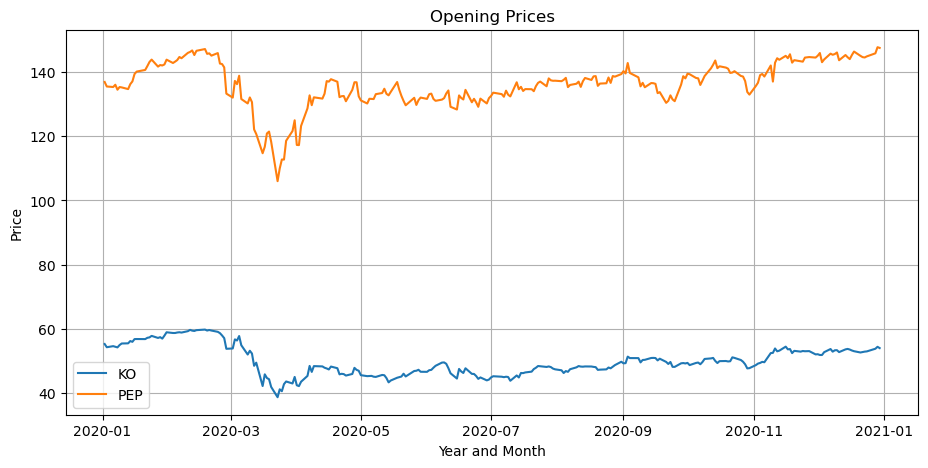

In [60]:
plt.figure(figsize=(11, 5))
# Open prices work best as they reflect the price at the start of the day
plt.plot(data["Open"][stockA], label=stockA)
plt.plot(data["Open"][stockB], label=stockB)
# Labels
plt.title("Opening Prices")
plt.xlabel("Year and Month")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()

In [62]:
import statsmodels.api as sm

# Steps to regress stockB on stockA

# Adding a y intercept
X = sm.add_constant(data["Open"][stockA])
# y is the data for stockB
y = data["Open"][stockB]

# The code below fit's a linear regression model of x and y
model = sm.OLS(y, X)
results = model.fit()

In [65]:
# Extract the residuals
residuals = results.resid

# rolling mean is used here because it provides a better mean picture than just the .mean() function
roll_mean = residuals.rolling(window=20).mean()

# rolling std is used here because it provides a better standard deviation picture than just the .std() function
roll_std = residuals.rolling(window=20).std()

# The z-score formula is used to create the z-scores (describes how far a value is from the mean of a group of values)
z_score = (residuals - roll_mean) / roll_std

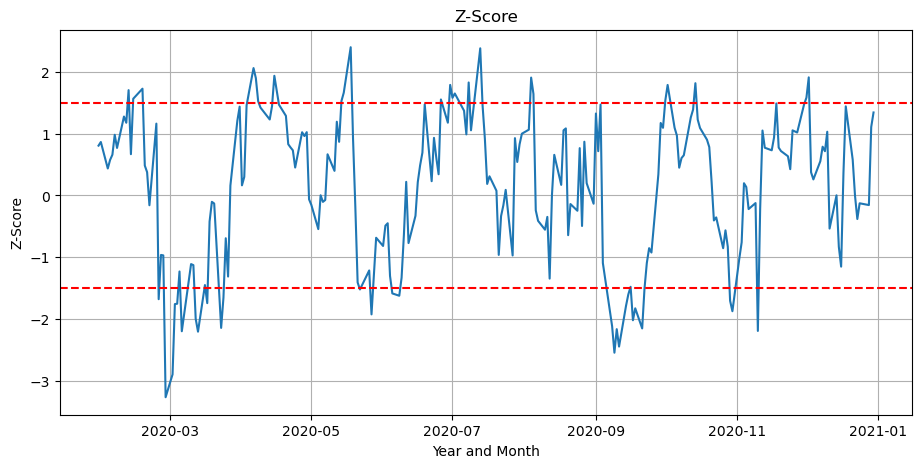

In [69]:
# A threshold is needed to determine when the z-score of a stock is truly worth buying or selling
threshold = 1.5

# Graphing the z-scores
plt.figure(figsize=(11, 5))
plt.plot(z_score)
plt.axhline(threshold, color="r", linestyle="--")
plt.axhline(-threshold, color="r", linestyle="--")
plt.title("Z-Score")
plt.xlabel("Year and Month")
plt.ylabel("Z-Score")
plt.grid(True)

plt.show()

In [70]:
data["Signal"] = np.where(z_score > threshold, -1, np.where(z_score < -threshold, 1, 0))
data["Position"] = data["Signal"].diff()

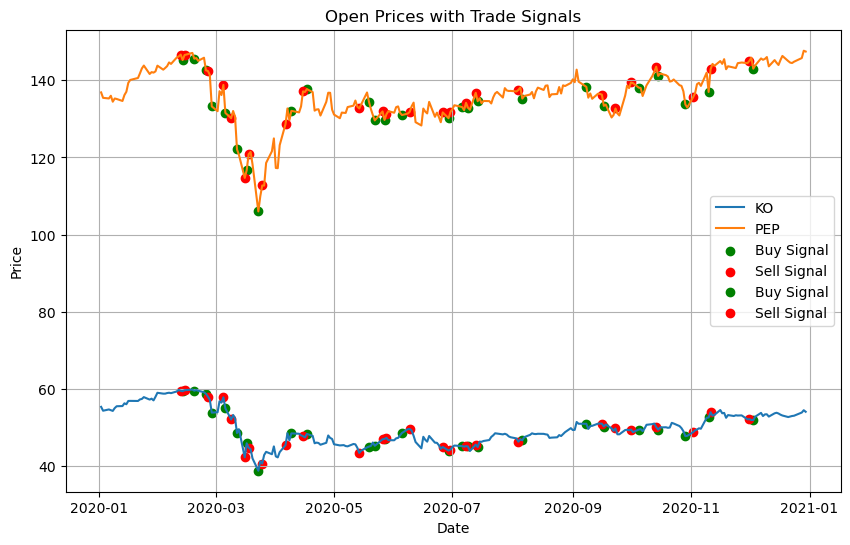

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(data["Open"][stock1], label=stock1)
plt.plot(data["Open"][stock2], label=stock2)
plt.scatter(data[data["Position"] == 1].index, data["Open"][stockA][data["Position"] == 1], color="g", label="Buy Signal")
plt.scatter(data[data["Position"] == -1].index, data["Open"][stockA][data["Position"] == -1], color="r", label="Sell Signal")
plt.scatter(data[data["Position"] == 1].index, data["Open"][stockB][data["Position"] == 1], color="g", label="Buy Signal")
plt.scatter(data[data["Position"] == -1].index, data["Open"][stockB][data["Position"] == -1], color="r", label="Sell Signal")
plt.title("Open Prices with Trade Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()

In [38]:
print(data["Adj Close"][stock1][data["Position"] == 1])

Date
2019-02-25    38.751102
2019-04-22    41.229134
2019-07-19    45.048626
2019-07-23    47.625835
2019-09-05    48.318348
2019-09-09    47.792397
2019-10-08    47.311779
2020-01-02    48.919540
2020-01-07    48.261219
2020-01-09    49.230900
2020-02-28    47.585125
2020-03-03    49.871410
2020-03-12    41.953907
2020-03-16    40.616764
2020-03-18    40.248821
2020-03-31    39.710381
2020-04-07    41.738525
2020-05-18    40.356522
2020-09-04    46.219917
2020-11-09    47.990784
2020-12-02    47.943851
Name: KO, dtype: float64
